In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('cash_app_financials.csv')
#df.rename(columns={'transaction_based_revenue': 'txn_based_revenue'}, inplace=True)
df.tail()

# note #s in thousands

,quarter,transaction_based_revenue,subscription_and_services_revenue,bitcoin_revenue,total_revenue,percent_bitcoin_revenue,cost_of_revenue,gross_profit
15,12/31/2022,"122,403","1,032,702","1,833,426","2,988,531",61.35%,"2,042,341","946,190"
16,3/31/2023,"134,663","1,085,749","2,163,751","3,384,163",63.94%,"2,374,209","1,009,954"
17,6/30/2023,"133,741","1,148,541","2,390,884","3,673,166",65.09%,"2,620,881","1,052,285"
18,9/30/2023,"120,783","1,169,561","2,423,584","3,713,928",65.26%,"2,636,439","1,077,490"
19,12/31/2023,"108,990","1,281,357","2,520,083","3,910,430",64.45%,"2,726,696","1,183,734"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   quarter                            20 non-null     object
 1   transaction_based_revenue          20 non-null     object
 2   subscription_and_services_revenue  20 non-null     object
 3   bitcoin_revenue                    20 non-null     object
 4   total_revenue                      20 non-null     object
 5   percent_bitcoin_revenue            20 non-null     object
 6   cost_of_revenue                    20 non-null     object
 7   gross_profit                       20 non-null     object
dtypes: object(8)
memory usage: 1.4+ KB


In [3]:
# Remove commas, convert revenue columns to integers, and adjust for thousands
columns_to_convert = ['transaction_based_revenue', 'subscription_and_services_revenue', 'bitcoin_revenue', 'total_revenue']
for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '').astype(int) * 1000



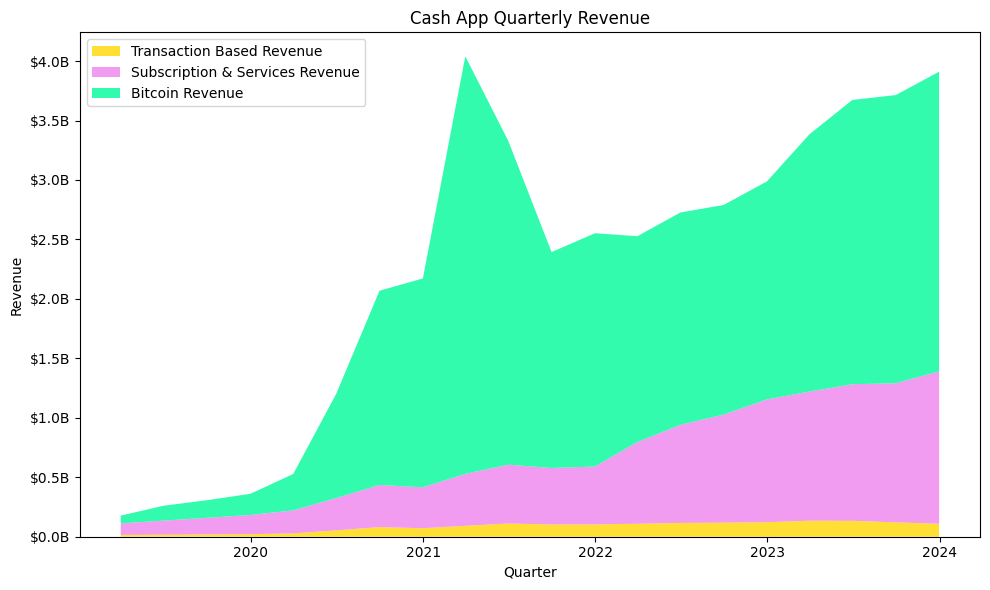

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import YearLocator, DateFormatter


# Convert 'quarter' column to datetime
df['quarter'] = pd.to_datetime(df['quarter'])

# Set up the color palette
colors = ['gold', 'violet', 'mediumspringgreen']

# Plotting the stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(df['quarter'],
              df['transaction_based_revenue'], 
              df['subscription_and_services_revenue'], 
              df['bitcoin_revenue'],
              labels=['Transaction Based Revenue', 'Subscription & Services Revenue', 'Bitcoin Revenue'],
              colors=colors, alpha=0.8)

# Formatting the y-axis to show revenue in billions and with a dollar sign
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.1f}B'.format(x*1e-9)))

# Formatting the x-axis to only display the year at year end
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.title('Cash App Quarterly Revenue')
plt.ylabel('Revenue')
plt.xlabel('Quarter')
plt.legend(loc='upper left')

plt.tight_layout()  # Improve layout

plt.show()


In [5]:
df.head()

,quarter,transaction_based_revenue,subscription_and_services_revenue,bitcoin_revenue,total_revenue,percent_bitcoin_revenue,cost_of_revenue,gross_profit
0,2019-03-31,15280000,96594000,65528000,177402000,36.94%,"92,591","84,811"
1,2019-06-30,16966000,118442000,125085000,260493000,48.02%,"155,152","105,341"
2,2019-09-30,19216000,139539000,148285000,307040000,48.30%,"183,550","123,490"
3,2019-12-31,21403000,161694000,177567000,360664000,49.23%,"216,638","144,026"
4,2020-03-31,27819000,193725000,306098000,527642000,58.01%,"344,910","182,732"


In [6]:
# Correctly formatting 'gross_profit' by removing commas, converting to int, and then plotting

# Removing commas and converting to integers
df['gross_profit'] = df['gross_profit'].str.replace(',', '').astype(int) * 1000


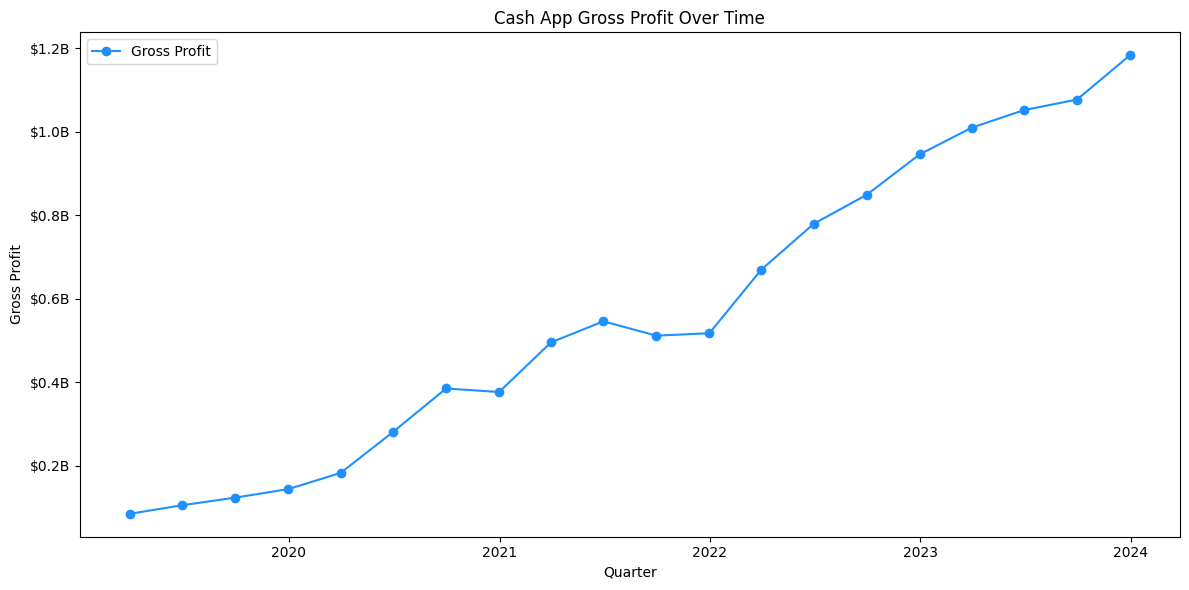

In [7]:
# Plotting gross profit over quarters
plt.figure(figsize=(12, 6))
plt.plot(df['quarter'], df['gross_profit'], color='dodgerblue', marker='o', linestyle='-', label='Gross Profit')

# Formatting the y-axis to show gross profit in billions and with a dollar sign
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.1f}B'.format(x*1e-9)))

# Formatting the x-axis to only display the year at year end
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.title('Cash App Gross Profit Over Time')
plt.ylabel('Gross Profit')
plt.xlabel('Quarter')
plt.legend()

plt.tight_layout()  # Improve layout

# Attempt to display the chart again
plt.show()
